In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("spotify_data clean.csv")   # change file name
df.head()


,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


In [3]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8582 non-null   object 
 1   track_name          8582 non-null   object 
 2   track_number        8582 non-null   int64  
 3   track_popularity    8582 non-null   int64  
 4   explicit            8582 non-null   bool   
 5   artist_name         8579 non-null   object 
 6   artist_popularity   8582 non-null   int64  
 7   artist_followers    8582 non-null   int64  
 8   artist_genres       5221 non-null   object 
 9   album_id            8582 non-null   object 
 10  album_name          8582 non-null   object 
 11  album_release_date  8582 non-null   object 
 12  album_total_tracks  8582 non-null   int64  
 13  album_type          8582 non-null   object 
 14  track_duration_min  8582 non-null   float64
dtypes: bool(1), float64(1), int64(5), object(8)
memory usag

,track_number,track_popularity,artist_popularity,artist_followers,album_total_tracks,track_duration_min
count,8582.000000,8582.000000,8582.000000,8.582000e+03,8582.000000,8582.000000
mean,5.772547,52.356211,69.730016,2.403472e+07,13.789443,3.492805
std,6.052792,23.816076,19.645979,3.803180e+07,11.887131,1.057970
min,1.000000,0.000000,0.000000,0.000000e+00,1.000000,0.070000
25%,1.000000,39.000000,60.000000,4.623200e+05,6.000000,2.880000
50%,4.000000,58.000000,74.000000,6.105547e+06,13.000000,3.445000
75%,9.000000,71.000000,84.000000,2.725255e+07,17.000000,3.990000
max,102.000000,99.000000,100.000000,1.455421e+08,181.000000,13.510000


In [4]:
df.isnull().sum()


track_id                 0
track_name               0
track_number             0
track_popularity         0
explicit                 0
artist_name              3
artist_popularity        0
artist_followers         0
artist_genres         3361
album_id                 0
album_name               0
album_release_date       0
album_total_tracks       0
album_type               0
track_duration_min       0
dtype: int64

In [5]:
# Numerical columns
df.fillna(df.mean(numeric_only=True), inplace=True)

# Categorical columns
df.fillna(df.mode().iloc[0], inplace=True)


In [6]:
df.drop_duplicates(inplace=True)


In [7]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | 
          (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,soundtrack,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8577,0AQquaENerGps8BQmbPw14,Big Iron,1,71,False,Marty Robbins,60,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,3.92
8578,4f8hBeMXMvssn6HtFAtblo,El Paso,10,64,False,Marty Robbins,61,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,4.32
8579,0Vy7wsXNFrbNc6UTWoScnM,Over the Rainbow,5,8,False,The Mystics,27,18184,doo-wop,2ifB9Xjp9DdpqLlYlY60QW,Presenting The Mystics,1959-02-11,9,compilation,2.28
8580,760clbeDBWmBsBLbszWuNZ,I'm A Man,2,55,False,Bo Diddley,44,333376,"blues, classic blues, rock and roll, rockabilly",1cbtDEwxCjMhglb49OgNBR,Bo Diddley,1958-01-01,12,album,2.74


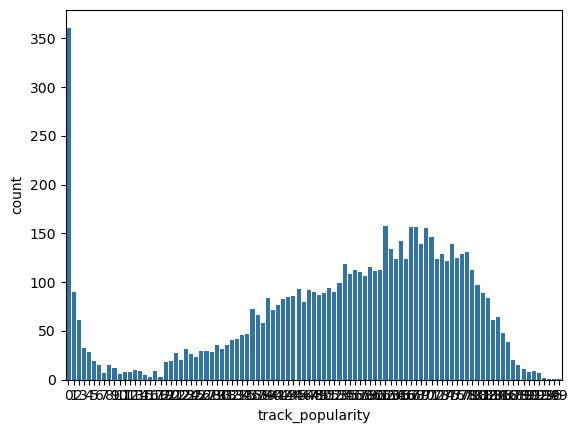

In [8]:
sns.countplot(data=df,x='track_popularity')
plt.show()


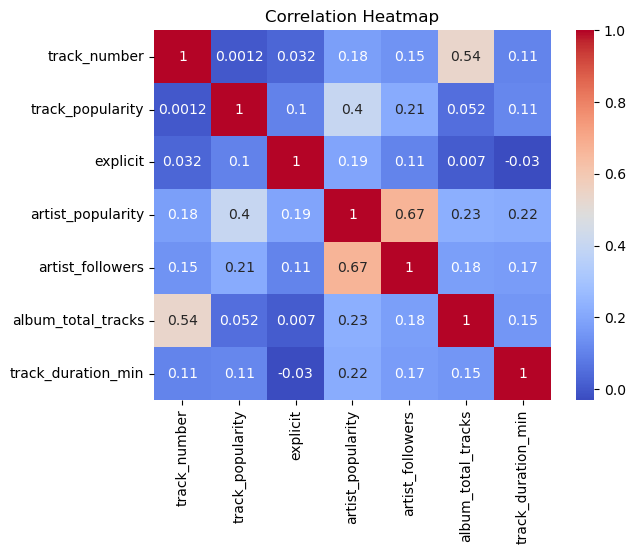

In [9]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

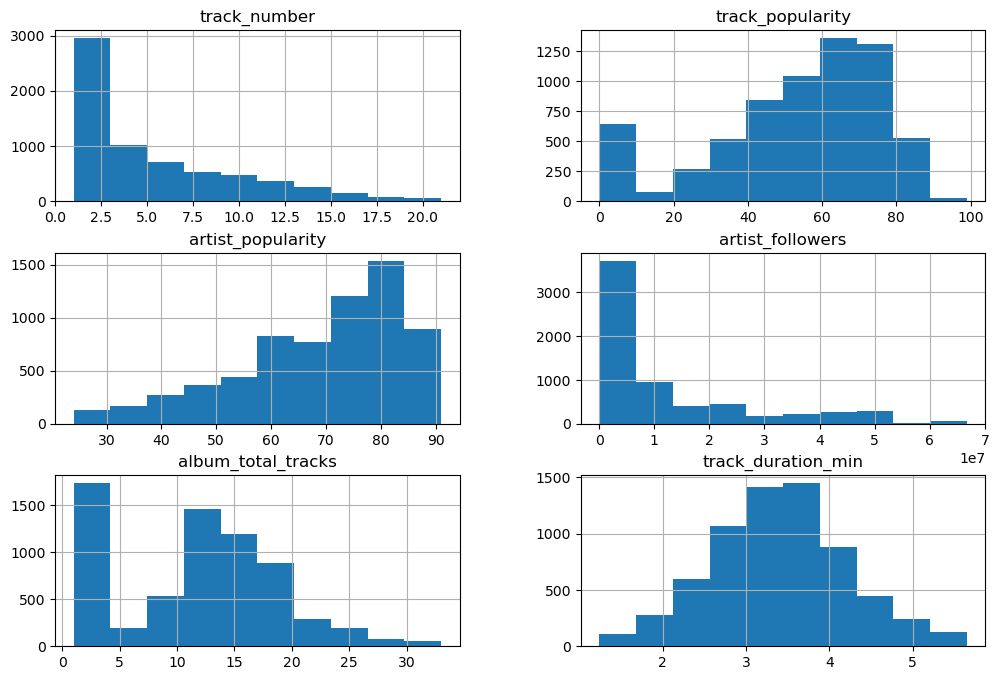

In [10]:
df.hist(figsize=(12,8))
plt.show()


In [11]:
encoder = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = encoder.fit_transform(df[col])


In [12]:
# Create target
df['target'] = (df['track_popularity'] >= 70).astype(int)

# Separate features and target
X = df.drop('target', axis=1)
X = X.select_dtypes(include=['int64', 'float64'])
y = df['target']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']
}

grid_lr = GridSearchCV(lr, params, cv=5)
grid_lr.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']})

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
params = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(dt, params, cv=5)
grid_dt.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [2, 5, 10]})

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
}

grid_rf = GridSearchCV(rf, params, cv=5)
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 200]})

In [18]:
from sklearn.svm import SVC

svm = SVC()
params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_svm = GridSearchCV(svm, params, cv=5)
grid_svm.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [19]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
params = {
    'n_neighbors': [3, 5, 7, 9]
}

grid_knn = GridSearchCV(knn, params, cv=5)
grid_knn.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [21]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print(classification_report(y_test, y_pred))


In [22]:
models = {
    "Logistic Regression": grid_lr.best_estimator_,
    "Decision Tree": grid_dt.best_estimator_,
    "Random Forest": grid_rf.best_estimator_,
    "SVM": grid_svm.best_estimator_,
    "Naive Bayes": nb,
    "KNN": grid_knn.best_estimator_
}

for name, model in models.items():
    print(f"\n{name}")
    evaluate(model, X_test, y_test)



Logistic Regression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       968
           1       1.00      1.00      1.00       356

    accuracy                           1.00      1324
   macro avg       1.00      1.00      1.00      1324
weighted avg       1.00      1.00      1.00      1324


Decision Tree
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       968
           1       1.00      1.00      1.00       356

    accuracy                           1.00      1324
   macro avg       1.00      1.00      1.00      1324
weighted avg       1.00      1.00      1.00      1324


Random Forest
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       968
           1       1.

In [23]:
best_model = grid_rf.best_estimator_